In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creat the data frame

In [4]:
data = pd.read_csv("Zomato data .csv")
#print(data)
df =pd.DataFrame(data)
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [5]:
def handleRate(value):
    value =str(value).split("/")
    value =value[0];
    return float(value)
df["rate"]=df["rate"].apply(handleRate)
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


listed_in(type)
Buffet      7
Cafes      23
Dining    110
other       8
Name: listed_in(type), dtype: int64


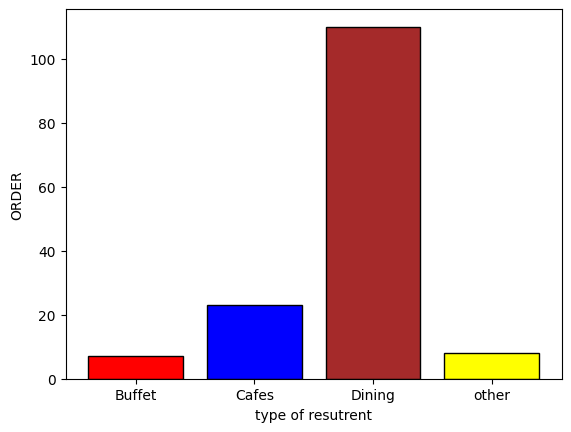

In [5]:
gp1= df.groupby("listed_in(type)")["listed_in(type)"].count()
print(gp1)
plt.bar(gp1.index,gp1.values,color =["red","blue","brown","yellow"],edgecolor="black")
x=gp1.index
y= gp1.values
plt.xlabel("type of resutrent")
plt.ylabel("ORDER")
plt.show()

In [ ]:
CONCLUSION - Majority of resutrant fall into Dining  category.

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


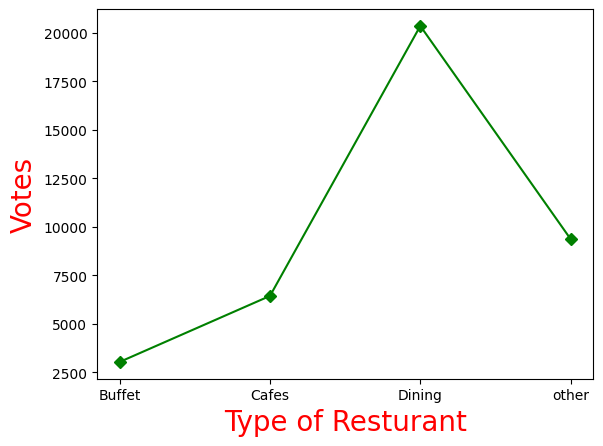

In [11]:
gp2=df.groupby("listed_in(type)")["votes"].sum()
print(gp2)
c = ["red","blue","brown","green"]
plt.plot(gp2.index,gp2.values,color ="green",marker ="D")
plt.xlabel("Type of Resturant",color = "red",size =20)
plt.ylabel("Votes",color="red",size =20)
plt.show()

CONCLUSION - dinning resturant has recieved maximum votes.

In [ ]:
Problem (3). What are the ratings that the majority of restaurants have received?

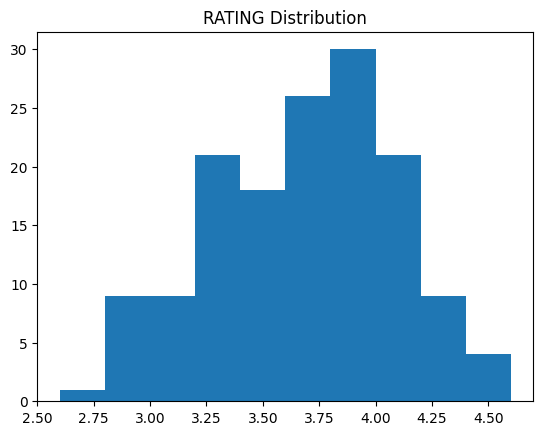

In [7]:
gp3=df.groupby(["listed_in(type)","rate"]).agg({"rate":"count"})
plt.hist(df["rate"],bins=10)
plt.title("RATING Distribution")
plt.show()

CONCLUSION - The majority resturants received rating from 3.5 to 4

Problem (4). Zomato has observed that most couples order most of their food online. What is their 
average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

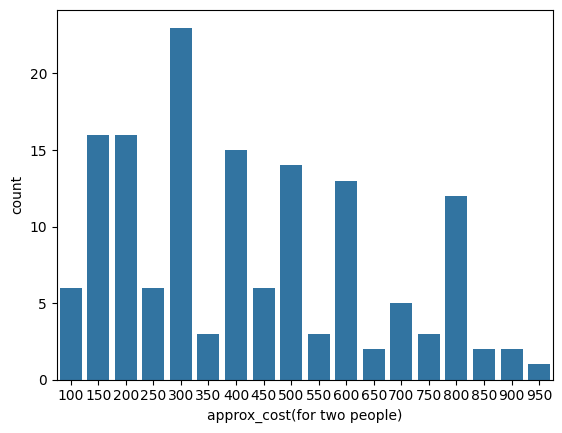

In [17]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

Conclusion - The majority of couple prefer resturants with an approximate cost of 300 rupees.

Problem (5)  Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

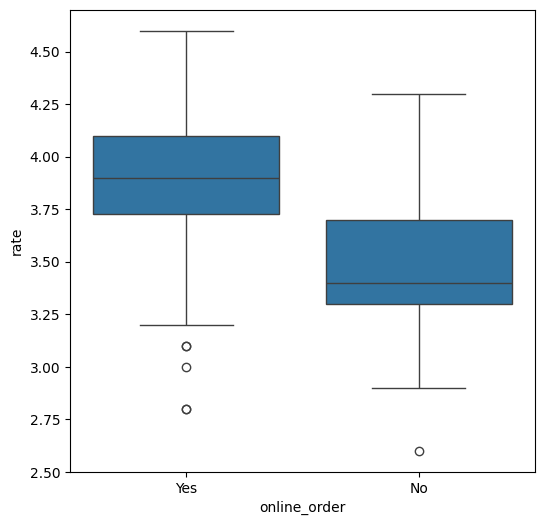

In [18]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate" , data =df)

Problem (6) Which type of restaurant received more offline orders, so that Zomato can provide those 
customers with some good offers?

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


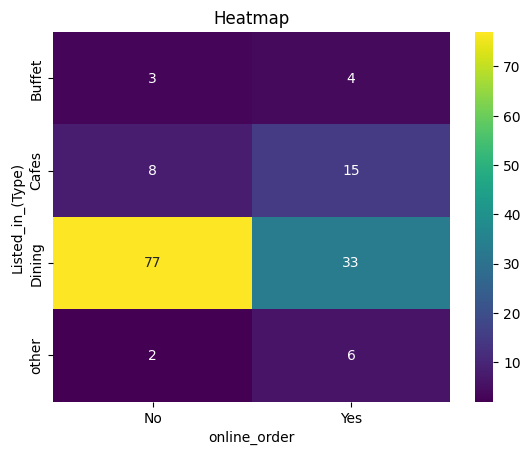

In [31]:
pivot_table = df.pivot_table(index = "listed_in(type)",columns ="online_order", aggfunc = "size" , fill_value = 0)
sns.heatmap(pivot_table, annot = True , cmap = "viridis",fmt = 'd')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("Listed_in_(Type)")
plt.show()

CONCLUSION - Dining resturant primarily accept offline orders. This sugest that client prefer to place order in person at resturant ,but prefer online ordering at cafes.